In [1]:
# import some helpful tools
import tools
import random
import copy
import numpy
from IPython.display import HTML, Image # For GIF

In [2]:
# 1D Desription of microstructure evolution
# Show video?
# Discretize space into a series of cell
# Assign a state to each cell
# At every time step local a neeighbourhood is defined to each cell
# A state change rule is applied as a function of the neightbouring cells
# Simulation proceeds in a series of discrete time steps and computing the new states


In [3]:
liq = 0
solid = 1

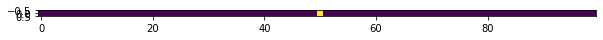

In [4]:
size = 100
n_steps = 100
state = [liq] * size

state[50] = solid
tools.display_state(state)

In [5]:
state_history = []
temp_state = copy.deepcopy(state)
state_history.append(state)
for dt in range(size):
    for cell in range(size):
        if sum(state[cell-1:cell+2]) > 0:
            temp_state[cell] = solid
    state = copy.deepcopy(temp_state)
    state_history.append(state)

In [6]:
def simulate_growth(size):
    state = [liq] * size
    state[51] = solid
    state[3] = solid
    temp_state = copy.deepcopy(state)
    state_history = [state]
    for dt in range(size):
        for cell in range(size):
            if cell == 0:
                if state[cell+1] == solid:
                    temp_state[cell] = solid
            elif cell == size-1:
                if state[cell-1] == solid:
                    temp_state[cell] = solid
            elif state[cell-1] == solid or state[cell+1] == solid:
                temp_state[cell] = solid
        state = copy.deepcopy(temp_state)
        state_history.append(state)
    return state_history

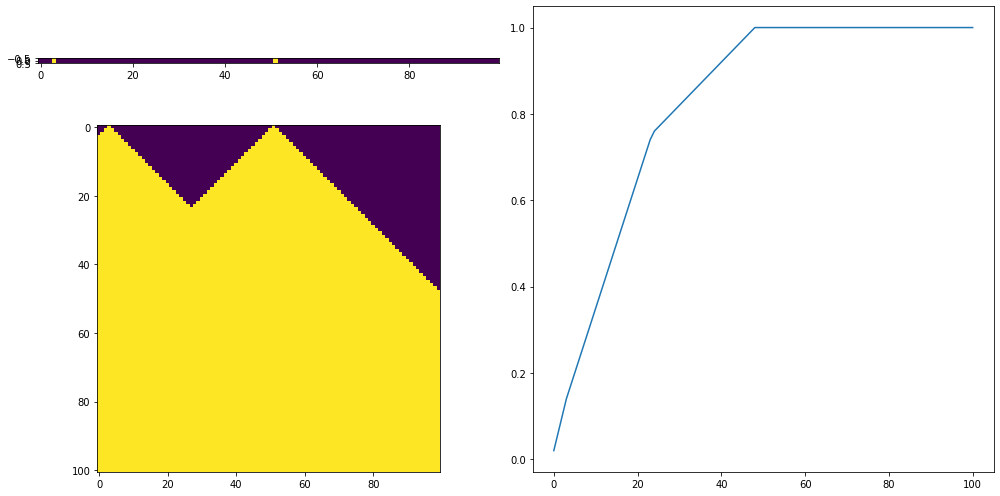

In [7]:
state_history = simulate_growth(100)
tools.display_growth(state_history, show_fraction=True)

In [8]:
# tools.animate_growth(state_history)
Image(url='test_anim.gif')

In [23]:
def simulate_growth_2D(size):

    state = numpy.zeros((size, size))
    state = tools.set_nucleation_sites(state, 100)
    # Nucleation site
    # state[size//2][size//5] = solid
    # state[size//3][size//6] = solid
    # state[size//7][size//2] = solid
    # Copy state to keep track of history
    temp_state = copy.deepcopy(state)
    state_history = []
    # Loop over each cell
    while numpy.sum(state) < size*size:
        for x in range(size):
            for y in range(size):
                if state[y,x] == solid:
                        temp_state[y-1:y+2, x-1:x+2] = solid

        state = copy.deepcopy(temp_state)
        state_history.append(copy.deepcopy(temp_state))
    return state_history

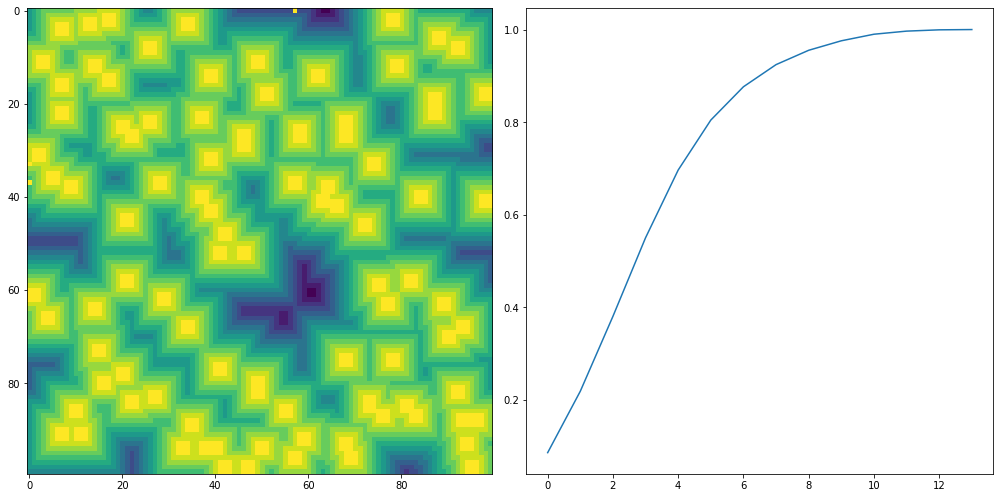

In [24]:
state_history = simulate_growth_2D(100)
tools.display_growth_2D(state_history)